# Forecasting using ARIMA models

This part switches focus to forcasting. One approach is to use an ARIMA model to predict the future metabolic features of the mice.

This file is meant as a somewhat discovery run of the ARIMA modeling using a guide: https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [60]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

mouse_df_list = list()

# pull 16 mice PCA data
for i in range(1,17):
    df = pd.read_excel("data/newmicedata/PCFAnimal{}.xlsx".format(i))
    mouse_df_list.append(df)

for i in range(len(mouse_df_list)):
    mouse_df_list[i] = mouse_df_list[i].drop(['Unnamed: 0'], axis=1)

# create individual lists for the three eventual graphs
pc1_list = []
pc2_list = []
pc3_list = []
for mouse in mouse_df_list:
    pc1_list.append(mouse.drop(['principal component 2', 'principal component 3'], axis=1))
    pc2_list.append(mouse.drop(['principal component 1', 'principal component 3'], axis=1))
    pc3_list.append(mouse.drop(['principal component 2', 'principal component 1'], axis=1))

pc1_list[0]

,DateTime,principal component 1
0,2022/11/04 14:01:00,17.132797
1,2022/11/04 14:31:00,16.811791
2,2022/11/04 15:01:00,15.028200
3,2022/11/04 15:31:00,14.183293
4,2022/11/04 16:01:00,11.949887
...,...,...
1136,2022/11/28 06:01:00,-1.396782
1137,2022/11/28 06:31:00,-4.110406
1138,2022/11/28 07:01:00,-0.687362
1139,2022/11/28 07:31:00,1.670424


In [61]:
pc1_list[0].head()

,DateTime,principal component 1
0,2022/11/04 14:01:00,17.132797
1,2022/11/04 14:31:00,16.811791
2,2022/11/04 15:01:00,15.028200
3,2022/11/04 15:31:00,14.183293
4,2022/11/04 16:01:00,11.949887


In [62]:
df = pc1_list[0]
df['DateTime'] = pd.to_datetime(df['DateTime'])
df.head()

,DateTime,principal component 1
0,2022-11-04 14:01:00,17.132797
1,2022-11-04 14:31:00,16.811791
2,2022-11-04 15:01:00,15.028200
3,2022-11-04 15:31:00,14.183293
4,2022-11-04 16:01:00,11.949887


In [63]:
df.set_index('DateTime',inplace=True)
df.head()

,principal component 1
DateTime,
2022-11-04 14:01:00,17.132797
2022-11-04 14:31:00,16.811791
2022-11-04 15:01:00,15.028200
2022-11-04 15:31:00,14.183293
2022-11-04 16:01:00,11.949887


In [64]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
principal component 1,1141.0,1.455013,5.159687,-7.310921,-2.871028,0.041705,5.272377,17.132797


<Axes: xlabel='DateTime'>

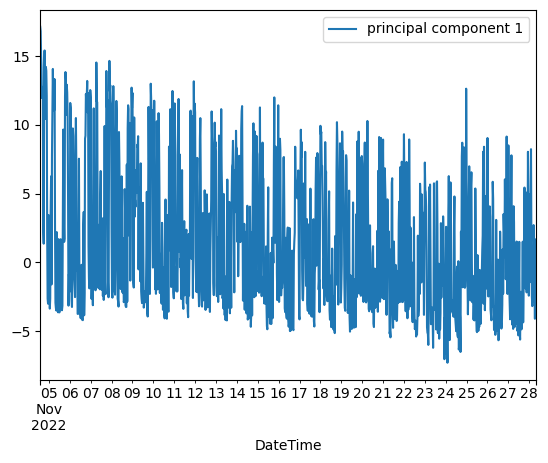

In [65]:
df.plot()

In [66]:
time_series = df['principal component 1']
type(time_series)

pandas.core.series.Series

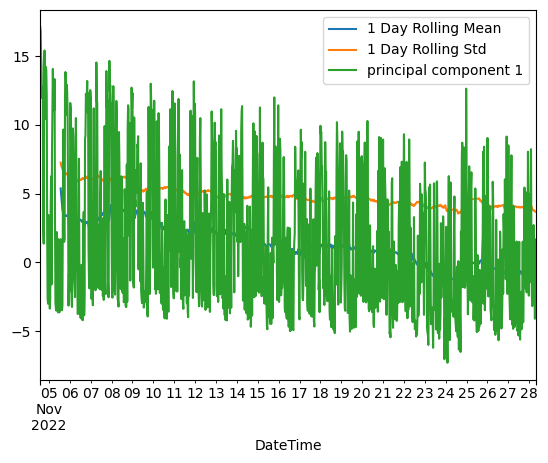

In [67]:
time_series.rolling(48).mean().plot(label='1 Day Rolling Mean')
time_series.rolling(48).std().plot(label='1 Day Rolling Std')
time_series.plot()
plt.legend()

In [68]:
from statsmodels.tsa.seasonal import seasonal_decompose

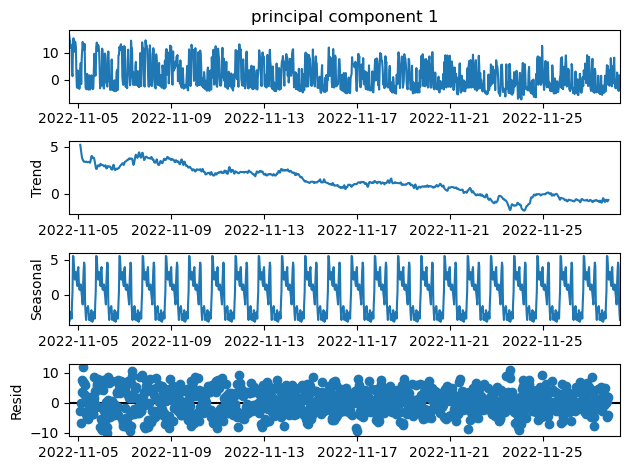

In [69]:
decompfreq = 48
decomp = seasonal_decompose(time_series, period=decompfreq)
fig = decomp.plot()

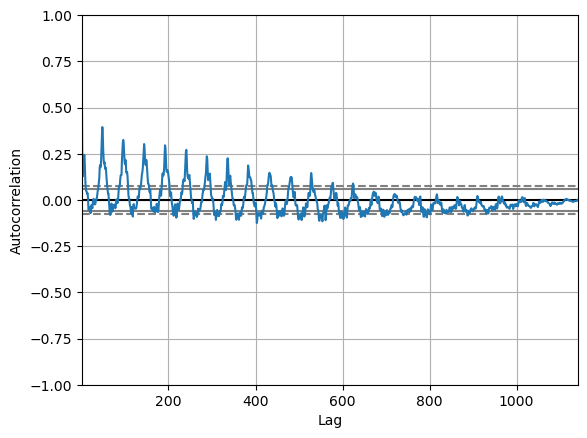

In [73]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df)
plt.show()


                                 SARIMAX Results                                 
Dep. Variable:     principal component 1   No. Observations:                 1141
Model:                   ARIMA(48, 1, 0)   Log Likelihood               -3133.722
Date:                   Tue, 27 Jun 2023   AIC                           6365.444
Time:                           11:52:25   BIC                           6612.344
Sample:                       11-04-2022   HQIC                          6458.685
                            - 11-28-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5322      0.030    -17.653      0.000      -0.591      -0.473
ar.L2         -0.7726      0.032    -24.046      0.000      -0.836      -0.710
ar.L3         -0.7848      0

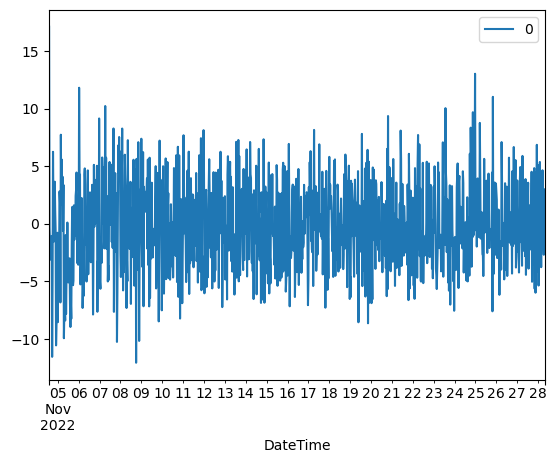

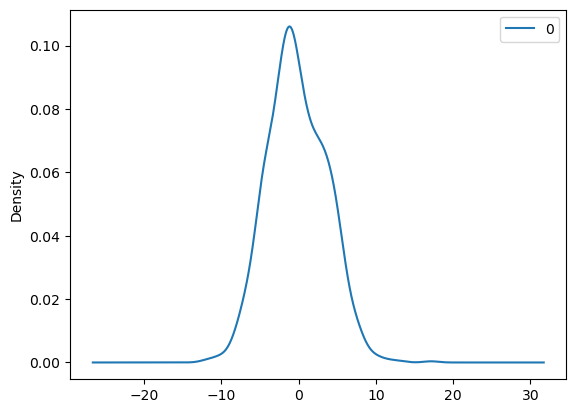

                 0
count  1141.000000
mean     -0.221060
std       3.819223
min     -12.062565
25%      -2.838902
50%      -0.539423
75%       2.540442
max      17.132797


In [75]:
# fit an ARIMA model and plot residual errors

from statsmodels.tsa.arima.model import ARIMA

# fit model 
model = ARIMA(df, order=(48,1,0), freq='30T')
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals (errors)
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                                 SARIMAX Results                                 
Dep. Variable:     principal component 1   No. Observations:                 1141
Model:                    ARIMA(1, 1, 0)   Log Likelihood               -3409.723
Date:                   Tue, 27 Jun 2023   AIC                           6823.446
Time:                           13:58:27   BIC                           6833.524
Sample:                       11-04-2022   HQIC                          6827.252
                            - 11-28-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1114      0.033     -3.412      0.001      -0.175      -0.047
sigma2        23.1983      1.021     22.716      0.000      21.197      25.200
Ljung-Box (L1) (Q):         

/Users/niklaschang/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)


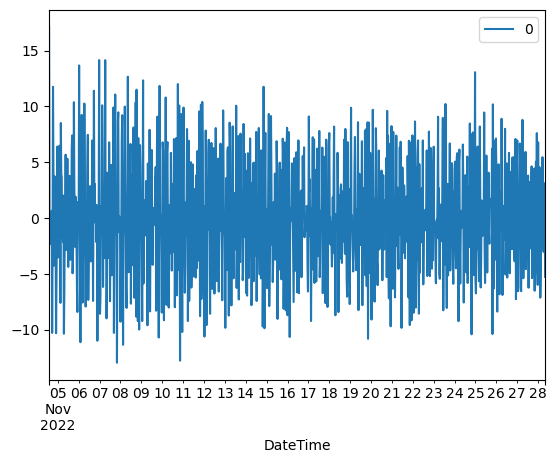

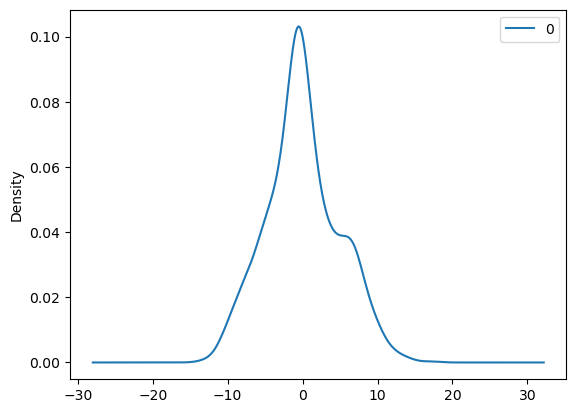

                 0
count  1141.000000
mean     -0.004892
std       4.843123
min     -12.949678
25%      -3.032509
50%      -0.340026
75%       2.936971
max      17.132797


In [76]:
# fit model 
model = ARIMA(df, order=(1,1,0), freq='30T')
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals (errors)
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

                                 SARIMAX Results                                 
Dep. Variable:     principal component 1   No. Observations:                 1141
Model:                    ARIMA(0, 1, 1)   Log Likelihood               -3377.089
Date:                   Tue, 27 Jun 2023   AIC                           6758.178
Time:                           13:58:36   BIC                           6768.256
Sample:                       11-04-2022   HQIC                          6761.984
                            - 11-28-2022                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6789      0.022    -31.243      0.000      -0.722      -0.636
sigma2        21.8959      1.099     19.917      0.000      19.741      24.051
Ljung-Box (L1) (Q):         

/Users/niklaschang/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency 30T will be used.
  self._init_dates(dates, freq)


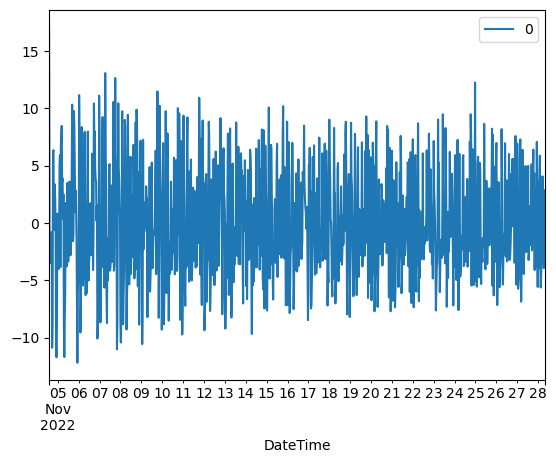

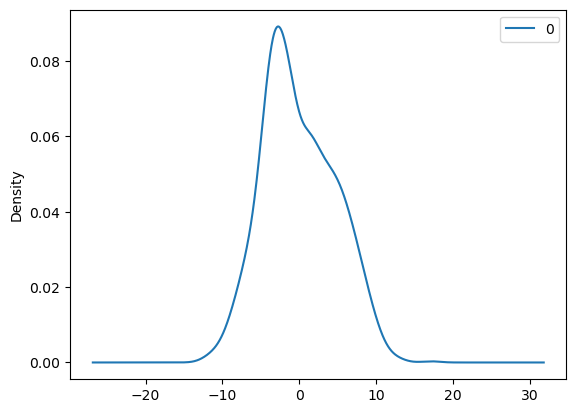

                 0
count  1141.000000
mean     -0.034523
std       4.706748
min     -12.203889
25%      -3.510077
50%      -0.712835
75%       3.526892
max      17.132797


In [77]:
# fit model 
model = ARIMA(df, order=(0,1,1), freq='30T')
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals (errors)
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())

predicted=9.906183, expected=5.794992
predicted=6.128736, expected=2.210880
predicted=2.474417, expected=-3.394426
predicted=-2.988477, expected=-3.563162
predicted=-3.550970, expected=-3.336930
predicted=-3.353277, expected=2.684443
predicted=2.249800, expected=-0.792444
predicted=-0.538131, expected=-2.922349
predicted=-2.767485, expected=-3.390696
predicted=-3.356675, expected=-3.398317
predicted=-3.397763, expected=-3.628158
predicted=-3.611463, expected=0.652698
predicted=0.341519, expected=1.168190
predicted=1.130814, expected=-4.453775
predicted=-4.045304, expected=-4.714241
predicted=-4.695368, expected=-0.843047
predicted=-1.123756, expected=-0.461644
predicted=-0.489249, expected=-3.320398
predicted=-3.113324, expected=-1.403434
predicted=-1.542778, expected=-3.030120
predicted=-2.911634, expected=-1.853280
predicted=-1.939106, expected=-3.253528
predicted=-3.151296, expected=2.291759
predicted=1.884694, expected=-3.601335
predicted=-3.159401, expected=6.654104
predicted=5.85

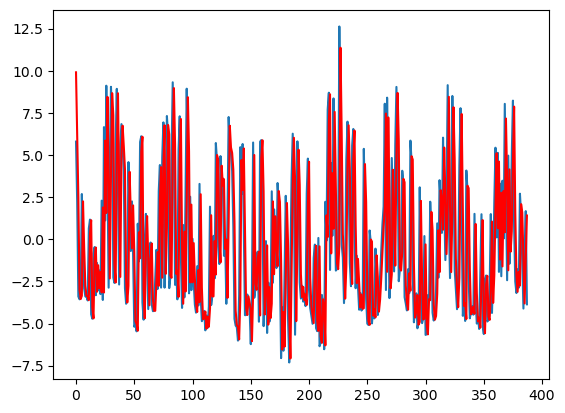

In [78]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# split into train and test sets
X = df.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(1,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()